In [1]:
pip install requests beautifulsoup4 pandas nltk wordcloud matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import requests
from bs4 import BeautifulSoup
import os

# Define the URL for British Airways reviews
url = "https://www.airlinequality.com/airline-reviews/british-airways"

# Send a GET request to the URL
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Check if the data was loaded successfully
if response.status_code == 200:
    print("Successfully fetched the webpage.")
else:
    print("Failed to retrieve the webpage.")

# Create a 'data' folder if it doesn't exist
data_folder = r"D:\Forage\BA\Data"
if not os.path.exists(data_folder):
    os.makedirs(data_folder)

# Scrape the review data
reviews = []
for review in soup.find_all('div', class_='text_content'):
    review_text = review.get_text(strip=True)
    reviews.append(review_text)

# Save the reviews to a text file for later analysis
file_path = os.path.join(data_folder, 'british_airways_reviews.txt')
with open(file_path, 'w', encoding='utf-8') as file:
    for review in reviews:
        file.write(review + "\n")

print(f"Scraped {len(reviews)} reviews and saved them to {file_path}.")


Successfully fetched the webpage.
Scraped 10 reviews and saved them to D:\Forage\BA\Data\british_airways_reviews.txt.


In [10]:
import nltk

# Download necessary NLTK resources (punkt for tokenization, stopwords for filtering)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hussa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hussa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hussa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load the reviews from the text file
file_path = r"D:\Forage\BA\Data\british_airways_reviews.txt"
with open(file_path, 'r', encoding='utf-8') as file:
    reviews = file.readlines()

# Remove any unnecessary whitespace
reviews = [review.strip() for review in reviews]

# Define a function to clean each review
def clean_review(review):
    # Convert text to lowercase
    review = review.lower()
    # Remove punctuation
    review = ''.join([char for char in review if char not in string.punctuation])
    # Tokenize the review
    words = word_tokenize(review)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Clean all reviews
cleaned_reviews = [clean_review(review) for review in reviews]

# Create a DataFrame with the cleaned data
df_reviews = pd.DataFrame(cleaned_reviews, columns=["Review"])

# Check the first few rows of the cleaned data
df_reviews.head()

,Review
0,✅trip verified flight time changed last minute...
1,✅trip verified im fraustrated flight cancelled...
2,✅trip verified sat plane hour forty five minut...
3,verified british airways stranding wife heathr...
4,✅trip verified although like many days avoid b...


In [12]:
pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   --------------------------------------- 626.3/626.3 kB 11.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(review):
    blob = TextBlob(review)
    return blob.sentiment.polarity

# Apply sentiment analysis
df_reviews['Sentiment'] = df_reviews['Review'].apply(get_sentiment)

# Check the first few rows of the data
df_reviews.head()

,Review,Sentiment
0,✅trip verified flight time changed last minute...,0.083333
1,✅trip verified im fraustrated flight cancelled...,-0.102381
2,✅trip verified sat plane hour forty five minut...,0.007738
3,verified british airways stranding wife heathr...,-0.175000
4,✅trip verified although like many days avoid b...,0.008929


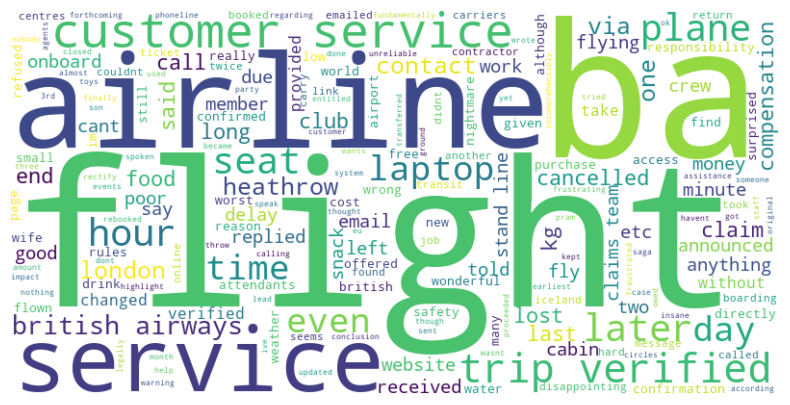

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all the reviews into a single string
all_reviews = ' '.join(df_reviews['Review'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

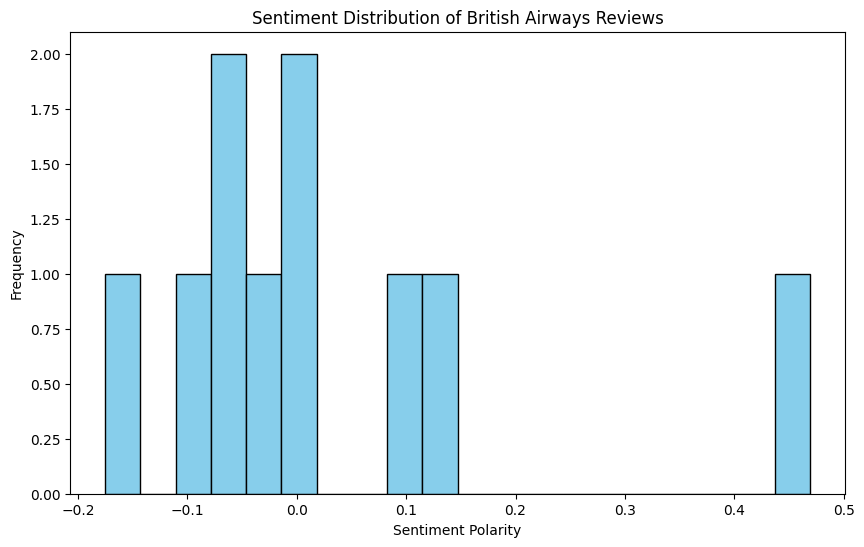

In [15]:
# Plot the sentiment distribution
plt.figure(figsize=(10, 6))
plt.hist(df_reviews['Sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Distribution of British Airways Reviews')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

In [16]:
pip install python-pptx

   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 3.8/3.8 MB 33.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
from pptx import Presentation
from pptx.util import Inches

# Create a PowerPoint presentation
prs = Presentation()

# Add a slide with title and content layout
slide_layout = prs.slide_layouts[1]  # 1 is for Title and Content
slide = prs.slides.add_slide(slide_layout)

# Set the title of the slide
title = slide.shapes.title
title.text = "British Airways Review Insights"

# Add a summary text
content = slide.shapes.placeholders[1]
content.text = "1. Most frequent words in reviews: " + ", ".join([word for word in wordcloud.words_.keys()][:5]) + "\n"  # Example
content.text += "2. Sentiment Analysis: The average sentiment score is {:.2f}".format(df_reviews['Sentiment'].mean()) + "\n"

# Save the PowerPoint presentation
pptx_path = os.path.join(data_folder, "British_Airways_Review_Insights.pptx")
prs.save(pptx_path)

print(f"PowerPoint slide created and saved to {pptx_path}.")

PowerPoint slide created and saved to D:\Forage\BA\Data\British_Airways_Review_Insights.pptx.


In [20]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   -- ------------------------------------- 7.6/124.9 MB 45.0 MB/s eta 0:00:03
   ----- ---------------------------------- 15.7/124.9 MB 40.5 MB/s eta 0:00:03
   ------- -------------------------------- 24.9/124.9 MB 41.5 MB/s eta 0:00:03
   ----------- ---------------------------- 36.2/124.9 MB 44.2 MB/s eta 0:00:03
   --------------- ------------------------ 48.0/124.9 MB 46.4 MB/s eta 0:00:02
   ------------------ --------------------- 59.0/124.9 MB 47.6 MB/s eta 0:00:02
   ---------------------- ----------------- 69.7/124.9 MB 47.7 MB/s eta 0:00:02
   ------------------------- -------------- 79.7/124.9 MB 47.7 MB/s eta 0:00:01
   ---------------------------- ----------- 90.2/124.9 MB 48.0 MB/s eta 0:00:01
   ------------------------------- -------- 99.9/124.9 MB 48.0 MB/s eta 0:00:01
   -------------------------------- ------ 105.4/124.9 MB 47.4 MB/s eta 0:00:01
   ---------------------------------- ---- 109.8/1


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import pandas as pd

# Define the file path for the dataset
file_path = r"D:\Forage\BA\Data\customer_booking.csv"

# Try reading the CSV with 'latin1' encoding to handle special characters
try:
    df = pd.read_csv(file_path, encoding='latin1')  # You can also try 'ISO-8859-1', 'utf-16', etc.
    print("File loaded successfully.")
except UnicodeDecodeError:
    print("Unicode decoding error encountered. Try using a different encoding like 'utf-16' or 'ISO-8859-1'.")

# Explore dataset
print("First few rows of the dataset:\n", df.head())  # Display first few rows to inspect the data
print("\nDataset info:\n", df.info())  # Display summary of the dataset
print("\nDescriptive statistics:\n", df.describe())  # Show statistics of the numeric columns


File loaded successfully.
First few rows of the dataset:
    num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight

In [26]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset with a specified encoding to avoid UnicodeDecodeError
file_path = r"D:\Forage\BA\Data\customer_booking.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Explore the dataset
print("First few rows of the dataset:\n", df.head())
print("\nDataset info:\n", df.info())
print("\nDescriptive statistics:\n", df.describe())

# Handle missing values if any (fill with median or mode as appropriate)
print("\nMissing values:\n", df.isnull().sum())
df.fillna(df.median(), inplace=True)  # Fill missing numeric values with median

# Feature Engineering - Convert categorical columns into numeric if necessary
# Convert 'flight_day' to a numerical format (e.g., one-hot encoding or LabelEncoding)
label_encoder = LabelEncoder()

# Assuming 'flight_day' is a categorical feature, we'll encode it using LabelEncoder
df['flight_day'] = label_encoder.fit_transform(df['flight_day'])

# Additional categorical columns can be encoded similarly

# Select features (X) and target (y)
# Assuming 'booking_status' is the target variable (you can adjust based on your dataset)
X = df.drop('booking_status', axis=1)  # Replace 'booking_status' with your actual target column
y = df['booking_status']  # Adjust the target column as necessary

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


First few rows of the dataset:
    num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \

TypeError: Cannot convert [['Internet' 'Internet' 'Internet' ... 'Internet' 'Internet' 'Internet']
 ['RoundTrip' 'RoundTrip' 'RoundTrip' ... 'RoundTrip' 'RoundTrip'
  'RoundTrip']
 ['Sat' 'Sat' 'Wed' ... 'Sat' 'Mon' 'Thu']
 ['AKLDEL' 'AKLDEL' 'AKLDEL' ... 'PERPNH' 'PERPNH' 'PERPNH']
 ['New Zealand' 'New Zealand' 'India' ... 'Australia' 'Australia'
  'Australia']] to numeric